In [1]:
'''Importo librerias de trabajo'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Importo Dataset Iris
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
'''Dimeciones del Dataset'''
data.shape

(150, 5)

In [4]:
'''Presencia de valores nulos'''
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

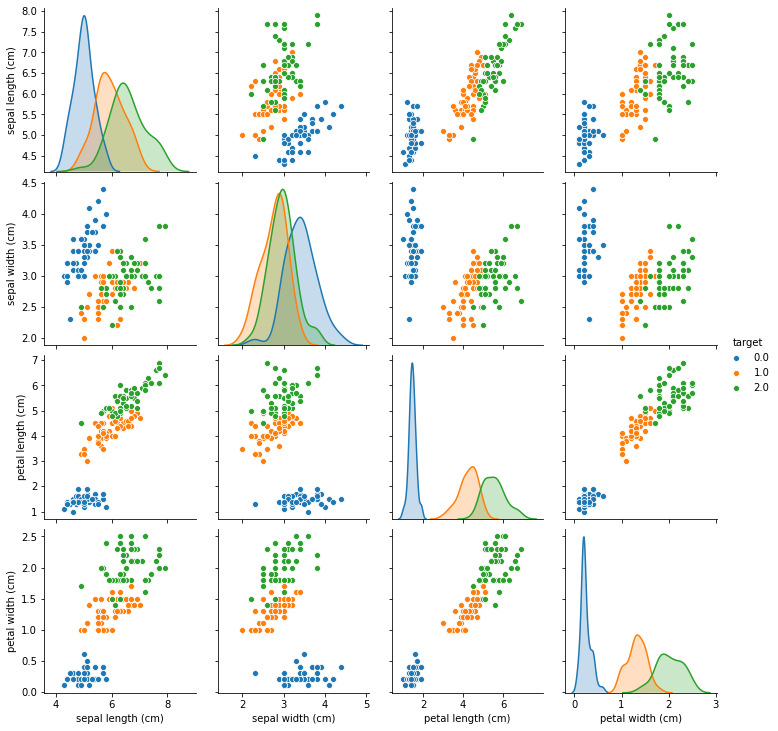

In [5]:
'''Graficos en general de DataSet'''
sns.pairplot(data, hue='target')

Ya que las variables petal length (cm), petal width (cm) logran una buena division del tipo de target, empleo exclusivamente dichas variables para realizar las predicciones.

In [6]:
'''Separo los datos para entrenar el modelo'''
x = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

In [7]:
'''Divido los datos de entrenamiento y de test'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [8]:
'''Importo y defino mi modelo KNeighborsClassifier con sus parametros por deafult'''
from sklearn.neighbors import KNeighborsClassifier
vecinos = KNeighborsClassifier()

In [9]:
'''Entreno el modelo'''
vecinos.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
print('Score del modelo en datos de Entrenamiento:',vecinos.score(X_train, y_train))
print('Score del modelo en datos de Test:', vecinos.score(X_test, y_test))

Score del modelo en datos de Entrenamiento: 0.9464285714285714
Score del modelo en datos de Test: 1.0


Realizo una Validacion cruzada, con el fin de comprobar que el desempeño del modelo no dependa de la particion de los datos para su entrenamiento y su test

# Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
score_vecinos = cross_val_score(vecinos, X_train, y_train, cv=5)

In [12]:
print(score_vecinos)
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (score_vecinos.mean(), score_vecinos.std() * 2))

[0.95652174 0.95652174 0.95454545 0.95454545 0.90909091]
Accuracy para KNN: 0.95 (+/- 0.04)


Al realizar Validacion cruzada, el modelo KNeighborsClassifier tiene una minima variacion en su score empleando Datos de entrenamiento.

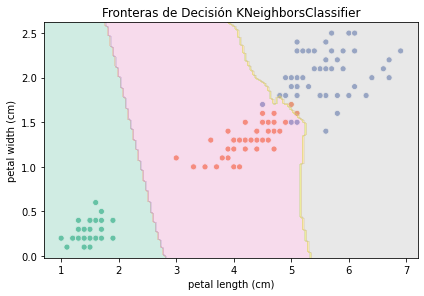

In [13]:
plt.figure()
ax = sns.scatterplot(x.iloc[:,0], x.iloc[:,1], hue=y.values, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=150),
                      np.linspace(*ylim, num=150))
Z = vecinos.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
# plt.savefig('KNN_iris.png', dpi = 400)
plt.title('Fronteras de Decisión KNeighborsClassifier')
plt.show()

Conclusión
- La implementacion del modelo `KNeighborsClassifier` resulto ser optima, ya que este modelo presenta un muy buen rendimiento al momento de realizar predicciones. Aun cuando se emplearon los modelos por default de sus hiperparametros
- Al realizar validacion cruzada me cerciore que el rendimiento del modelo no fuera dependiende de la particion de los datos realizada en el `Train_test_split`.
- Realice la division de los datos del Dataset en datos de Train y Test, con el fin de emplear los datos en Train como los datos de entrenamiento y evualuar el desempeño con los datos de Test (datos nunca vistos por el modelo).
- Al graficar las fronteras de decision que toma el modelo al momento de clasificar es evidente que el modelo presenta errores al momento de clasificar datos de `target` 1 y 2.